In [1]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
delivary1=pd.read_csv('delivery_time.csv')

In [3]:
# Renaming Columns
delivary1=delivary1.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [4]:
delivary1.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\Users\Ajay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

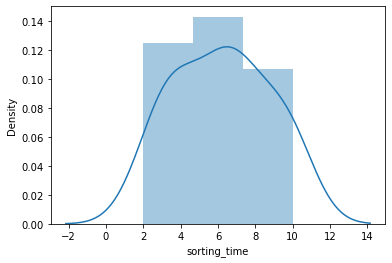

In [5]:
sns.distplot(delivary1['sorting_time'])

C:\Users\Ajay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

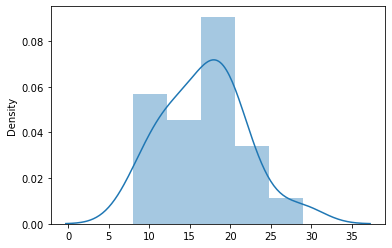

In [6]:
sns.distplot(delivary1[['delivery_time']])

In [7]:
delivary1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
delivary1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


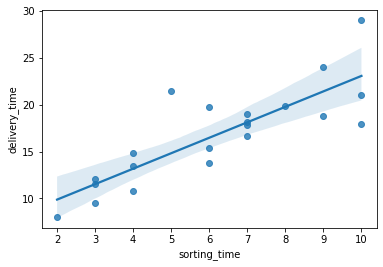

In [9]:
dplot=sns.regplot(x='sorting_time',y='delivery_time',data=delivary1)

In [10]:
# Model Building
import statsmodels.formula.api as smf
model1 = smf.ols(formula="delivery_time~sorting_time",data = delivary1).fit()

In [11]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        23:57:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
# Testing of model using formula of simple linear regression manually
delivery_time = (6.582734) + (1.649020)*(12)
delivery_time

26.370973999999997

In [14]:
# Testing of model automatic
new_data=pd.Series([12,8])
new_data

0    12
1     8
dtype: int64

In [15]:
new_data=pd.DataFrame(new_data,columns=['sorting_time'])
new_data

,sorting_time
0,12
1,8


In [16]:
model1.predict(new_data)

0    26.370973
1    19.774893
dtype: float64

In [17]:
# prediction on our original data
model1.predict(delivary1)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64